In [1]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
import os
import cv2
import numpy as np

Using TensorFlow backend.


Adding Images From Media

In [2]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            #print (os.path.splitext(os.path.basename(filename))[1])
            filenames.append(os.path.splitext(os.path.basename(filename))[0])
    
    return images,filenames

In [3]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [4]:
def extract_face(image, required_size=(224, 224)):
  # load image and detect faces
    image =image
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [5]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

16 12
0 6 0.07048529386520386
1 8 0.02490854263305664
2 7 0.03228175640106201
4 9 0.03721100091934204
5 4 0.028124749660491943
6 11 0.05194270610809326
8 1 0.018275856971740723
9 10 0.027911126613616943
10 2 0.05497235059738159
11 3 0.07024991512298584
12 5 0.012978196144104004
13 0 0.020936012268066406
Suspecious students are


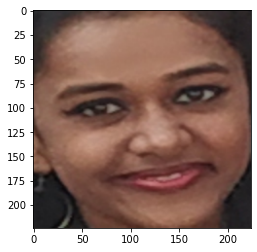

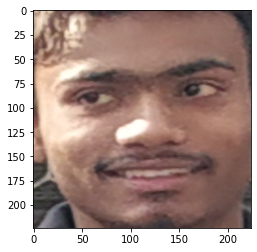

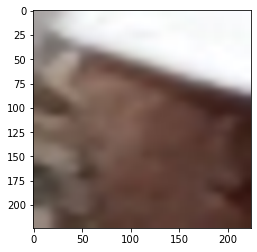

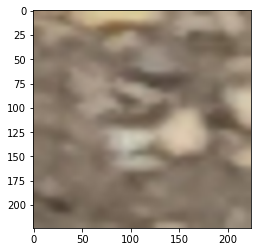

In [14]:
fold_img,filenames=load_images_from_folder("face recognition/extracted faces")

image =extract_face_from_image('img1.jpg')    #if we have the path of file
# image = extract_face(image) #if we have direct image

arr_susp=arr_absent=[]
model_scores_img = get_model_scores(image)
model_scores_fold_img = get_model_scores(fold_img)

print(len(image),len(fold_img))
for idx, face_score_1 in enumerate(model_scores_img):
    for idy, face_score_2 in enumerate(model_scores_fold_img):
        score = cosine(face_score_1, face_score_2)
        if score <= 0.3:
            arr_susp.append(idx)
            # Printing the IDs of faces and score
            print(idx, idy, score)
            # Displaying each matched pair of faces
            '''print(idx,idy)
            plt.imshow(image[idx])
            plt.show()
            plt.imshow(fold_img[idy])
            plt.show()'''
            

flag=0
print("Suspecious students are")
arr_susp.sort()
for i in range(len(image)):
    if arr_susp.count(i)==0:
        plt.imshow(image[i])
        plt.show()
        flag=1
        
if flag==0:
    print("No suspecious person")
        
        
    



   
    
    
